# 911 Call

## Introduction

This project aims to explore a 911 calls dataset. The data contains these variables:
    
* lat: latitude
* lng: longitude
* desc: description of the emergency call
* zip: postal code
* title: title of call, emergency brief description
* timeStamp: data and time record
* twp: Township
* addr: addrece
* e: Dummy variable (there is not much information about)

### Imports

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('data/911.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Check the most common zip to registrate an occurrence

In [5]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Check the most common Township to registrate an occurrence

In [6]:
data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Check how many codes there are for call title

In [7]:
data['title'].nunique()

110

## Data Manipulation

In [8]:
# Create a new variables called reason
data['reason'] = data['title'].apply(lambda title: title.split(':')[0])
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [9]:
data['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

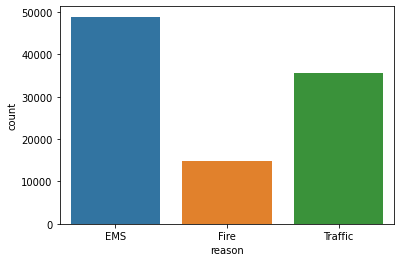

In [10]:
sns.countplot(x = 'reason', data = data);

In [11]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])
type(data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
# Create a new variable with timeStamp Data

data['hour'] = data['timeStamp'].apply(lambda x: x.hour)
data['month'] = data['timeStamp'].apply(lambda x: x.month)
data['dayOfWeek'] = data['timeStamp'].apply(lambda x: x.dayofweek)
data['date'] = data['timeStamp'].apply(lambda date: date.date())

dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

data['dayOfWeek'] = data['dayOfWeek'].map(dmap)

data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


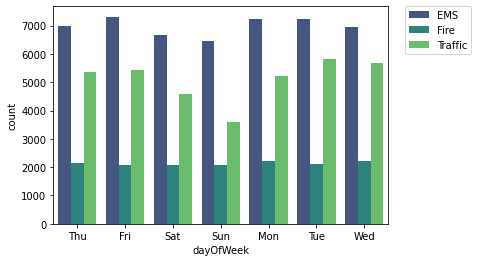

In [22]:
sns.countplot(x = 'dayOfWeek', data = data, hue = 'reason', palette= 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.);

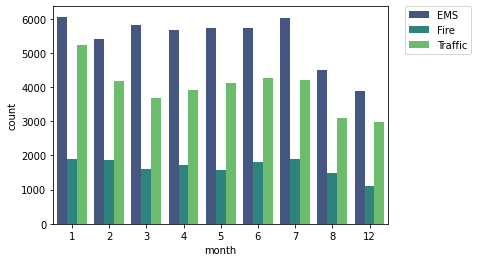

In [23]:
sns.countplot(x = 'month', data = data, hue = 'reason', palette= 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.);

In [34]:
byMonth = data.groupby('month').count()
byMonth.reset_index()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayOfWeek
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


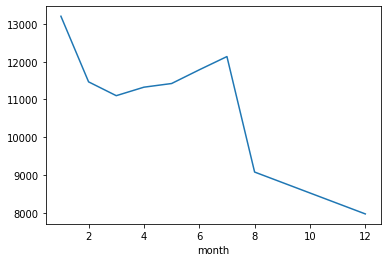

In [35]:
byMonth['lat'].plot();

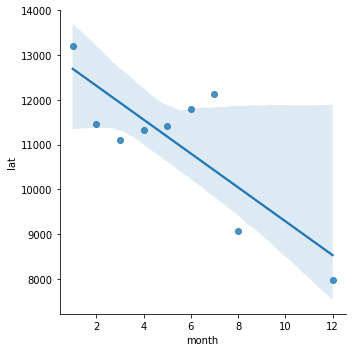

In [39]:
sns.lmplot(x = 'month', y = 'lat', data = byMonth.reset_index());

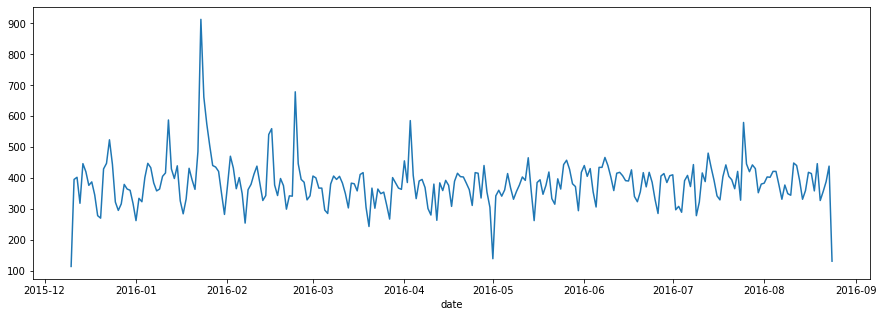

In [55]:
data.groupby('date').count()['lat'].plot(figsize=(15,5));

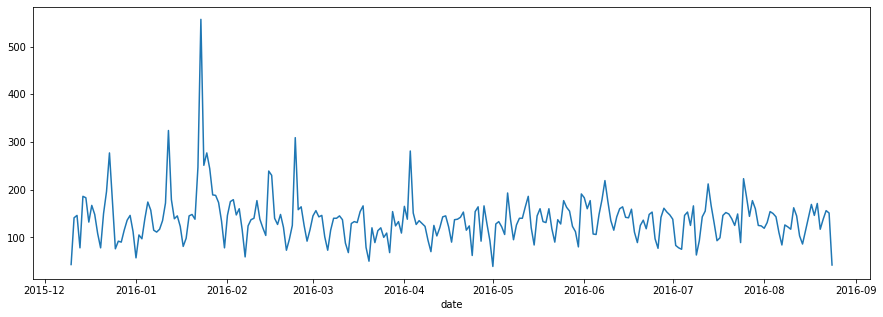

In [63]:
data[data['reason'] == 'Traffic'].groupby('date').count()['lat'].plot(figsize=(15,5));

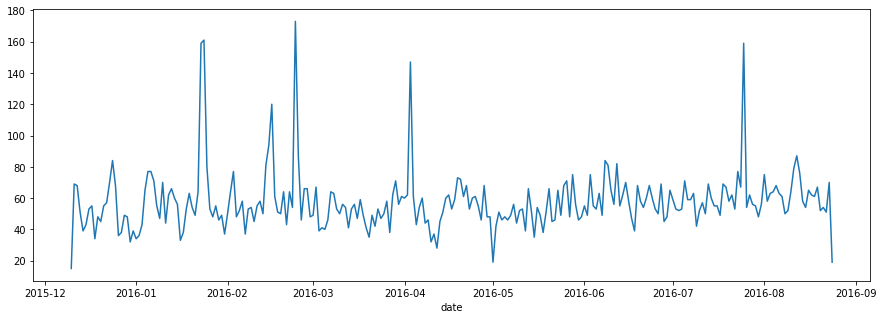

In [64]:
data[data['reason'] == 'Fire'].groupby('date').count()['lat'].plot(figsize=(15,5));

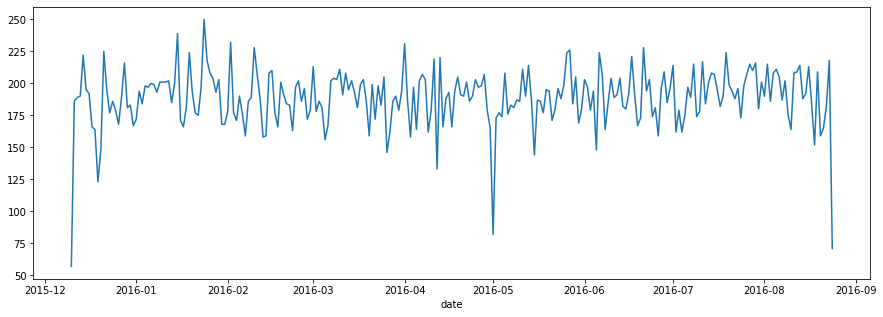

In [65]:
data[data['reason'] == 'EMS'].groupby('date').count()['lat'].plot(figsize=(15,5));

In [77]:
dayHour = data.groupby(by = ['dayOfWeek', 'hour']).count()['lat'].unstack()
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


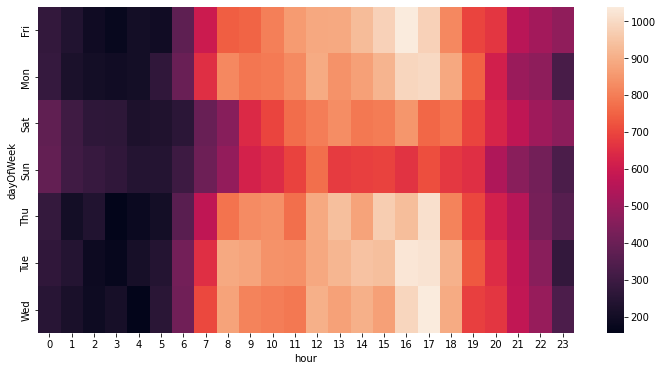

In [80]:
plt.figure(figsize = (12, 6))
sns.heatmap(dayHour);

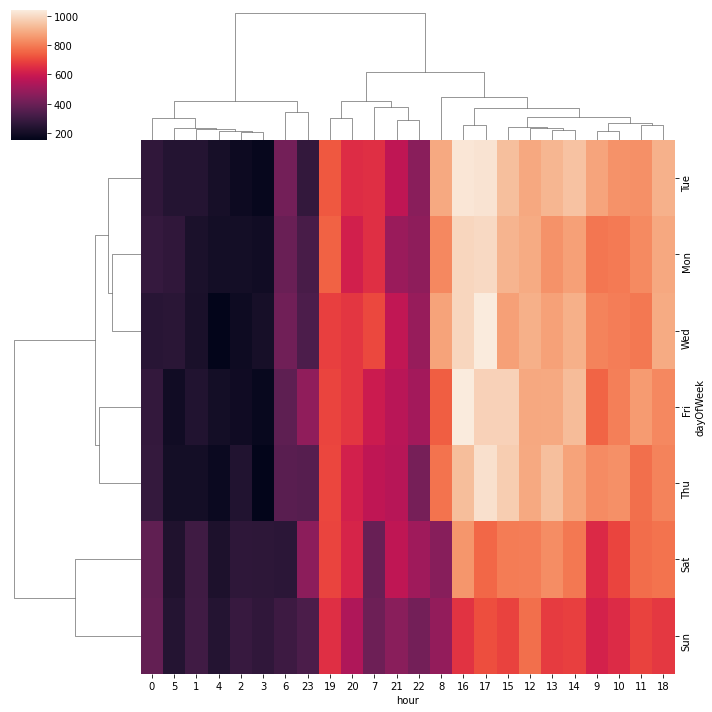

In [82]:
sns.clustermap(dayHour);

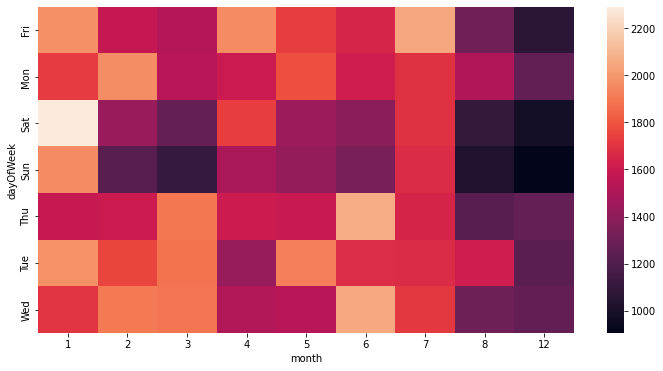

In [84]:
dayMonth = data.groupby(by = ['dayOfWeek', 'month']).count()['lat'].unstack()
plt.figure(figsize = (12, 6))
sns.heatmap(dayMonth);

# Financial Market Project

In [89]:
import datetime

import numpy             as np
import seaborn           as sns
import pandas            as pd
import matplotlib.pyplot as plt

from plotly.offline    import download_plotlyjs, init_notebook_mode, plot, iplot
from pandas_datareader import data, wb

init_notebook_mode(connected = True)
sns.set_style('ticks')
%matplotlib inline

## Getting Data

Precisamos obter dados usando o datareader de pandas. Obteremos informações sobre ações para os seguintes bancos:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Descubra como obter os dados de ações de 1 de janeiro de 2006 a 1º de janeiro de 2016 para cada um desses bancos. Defina cada banco como um dataframe separado, com o nome da variável para que esse banco seja seu símbolo de ticker. Isso envolverá algumas etapas:**
1. Use datetime para definir objetos de início e fim de data e hora.
2. Descobrir o símbolo do ticker para cada banco.
2. Descubra como usar o datareader para pegar as cotações.

Use [esta página de documentação](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) para obter dicas e instruções. Use o google finance como um fonte, por exemplo:
    
     # Banco da América
     BAC = data.DataReader ("BAC", "google", início e fim)


In [7]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2021, 12, 31)

# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)

# CitiGroup
C = data.DataReader('C', 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [10]:
print('Bank of America: {}'.format(len(BAC)))
print('CitiGroup: {}'.format(len(C)))
print('Goldman Sachs: {}'.format(len(GS)))
print('JPMorgan Chase: {}'.format(len(JPM)))
print('Morgan Stanley: {}'.format(len(MS)))
print('Wells Fargo: {}'.format(len(WFC)))

Bank of America: 4028
CitiGroup: 4028
Goldman Sachs: 4028
JPMorgan Chase: 4028
Morgan Stanley: 4028
Wells Fargo: 4028


In [11]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [18]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys = tickers, axis = 1)
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
bank_stocks.head(5)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.942661  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.582176  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.625431  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.574963  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.596592  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.114265  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.139030  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.238140  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.275299  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.659286  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.444872  
2006-01-04   31.799999  31.530001  10870000.0  20.207731  
2006-01-05   31.500000  31.495001  10158000.0  20.185305  
2006-01-06   31.580000  31.680000   8403800.0  20.303873  
2006-01-09   31.674999  31.674999   5619600.0  20.300671  

[5 rows x 36 columns]

In [23]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     423.850006
JPM    171.779999
MS     105.449997
WFC     65.930000
dtype: float64

In [33]:
returns = pd.DataFrame()

In [36]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2021-12-27,0.004953,0.007308,0.007791,0.005723,0.010670,0.008478
2021-12-28,0.001344,-0.000495,-0.001108,0.003035,-0.004283,-0.007177
2021-12-29,-0.001566,-0.001320,-0.003638,-0.000504,-0.012404,0.000620


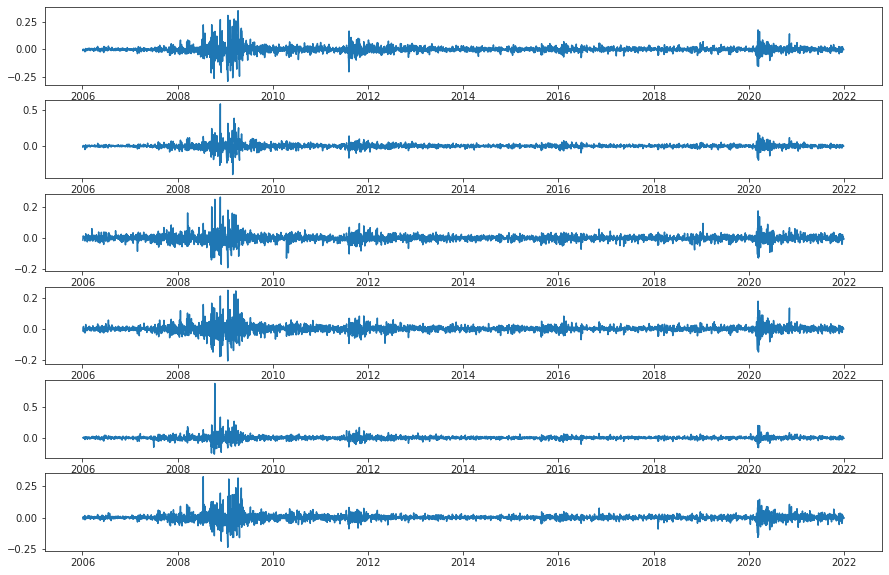

In [85]:
fig, axs = plt.subplots(6, figsize = (15, 10))
axs[0].plot(returns['BAC Return'])
axs[1].plot(returns['C Return'])
axs[2].plot(returns['GS Return'])
axs[3].plot(returns['JPM Return'])
axs[4].plot(returns['MS Return'])
axs[5].plot(returns['WFC Return']);

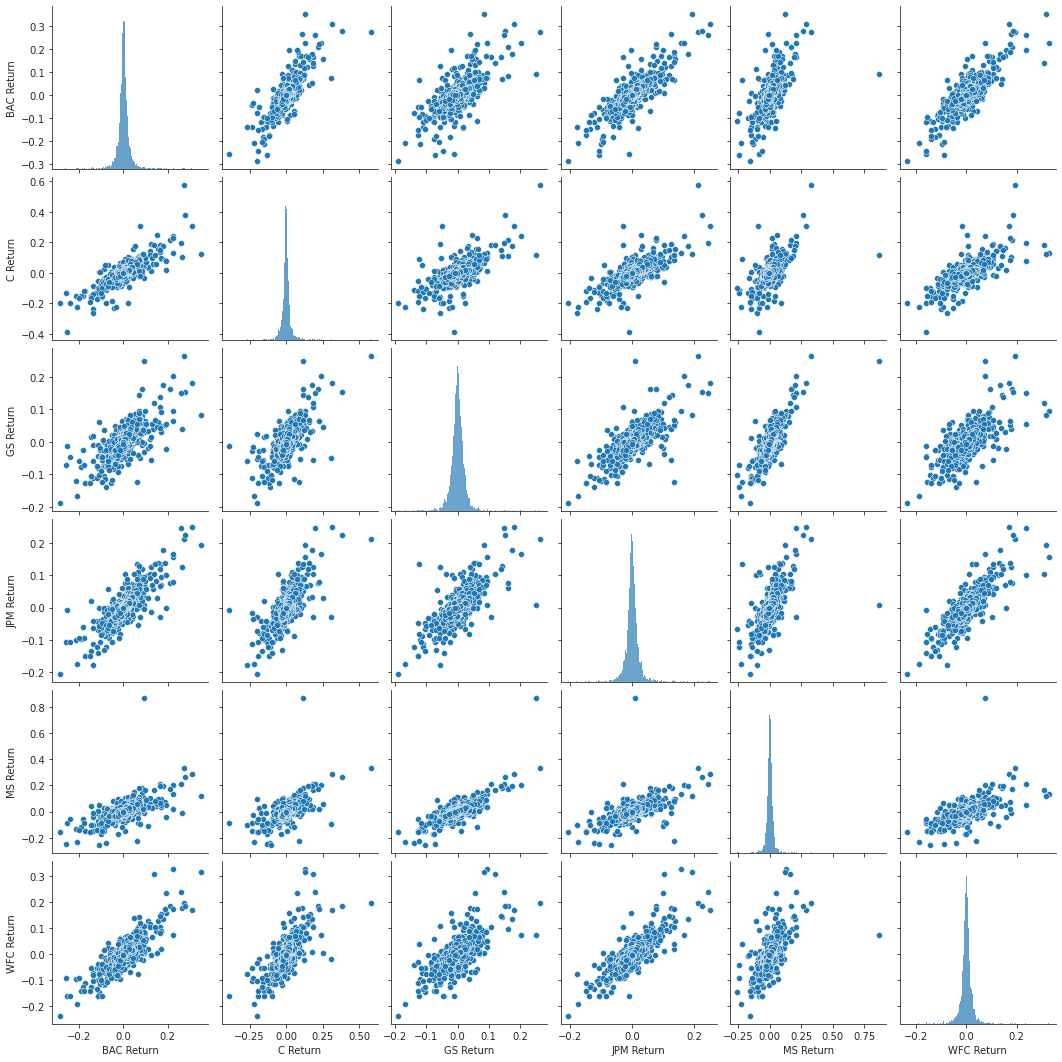

In [86]:
sns.pairplot(returns[1:]);

In [57]:
# Identifique o pior dia de retorno
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

Alguns bancos compartilham a dta 2009-01-20 como o dia de pior retorno, esse dia foi o dia em que Barack Obama tomou posse nos EUA, talvez as incertezas atreladas ao discurso tenha motivado a "fuga" de investidores na bolsa

In [64]:
# Desvio padrão da série de retornos
returns.std()

BAC Return    0.031717
C Return      0.033556
GS Return     0.023327
JPM Return    0.024607
MS Return     0.032579
WFC Return    0.027167
dtype: float64

O ativo com maior desvio padrão foi o do CitiGroup. Um maior DP implica em maior volatilidade, sendo assim considerado um ativo de alto risco

In [66]:
# Consultando o desvio padrão de um período específico de tempo
returns[(returns.index.date >= datetime.date(2015, 1, 1)) &
        (returns.index.date < datetime.date(2016, 1, 1))].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

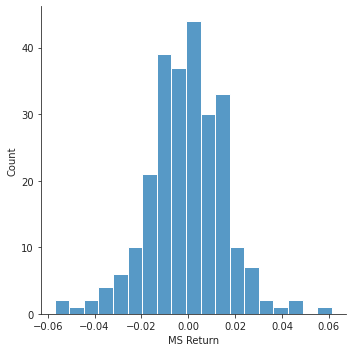

In [87]:
sns.displot(returns[(returns.index.date >= datetime.date(2015, 1, 1)) &
        (returns.index.date < datetime.date(2016, 1, 1))]['MS Return']);

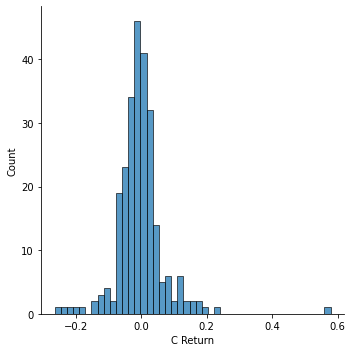

In [76]:
sns.displot(returns[(returns.index.date >= datetime.date(2008, 1, 1)) &
        (returns.index.date < datetime.date(2009, 1, 1))]['C Return']);

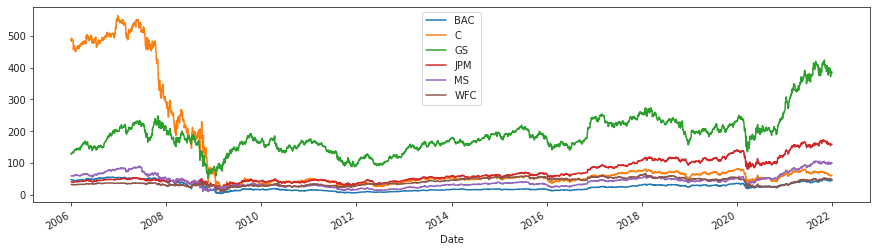

In [92]:
# Crie um gráfico mostranto o preço de fechamento para cada banco, contendo todo o índice de tempo
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(15,4), label = tick)
plt.legend();

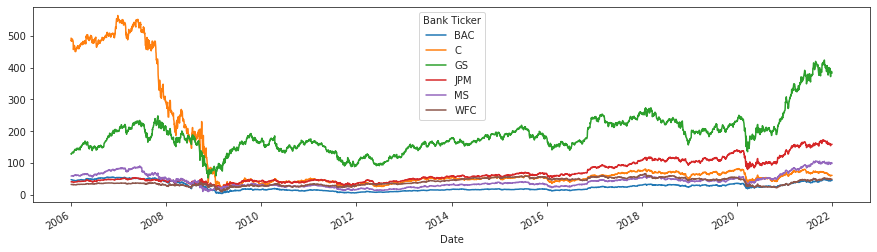

In [98]:
bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).plot(figsize=(15,4), label = tick);

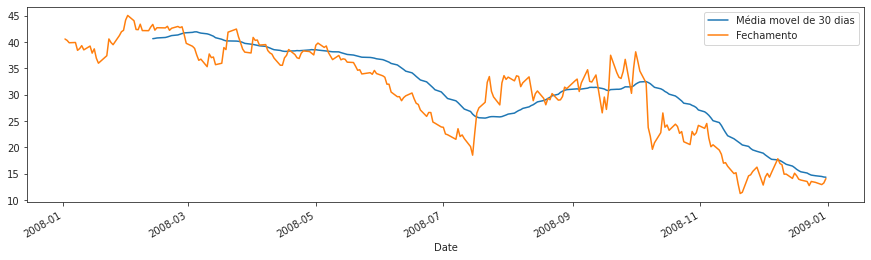

In [114]:
# Trace a média de 30 dias para o preço próximo do Bank Of America para o ano de 2008
plt.figure(figsize=(15,4))

BAC2008 = BAC['Close'][BAC.index.year == 2008]
BAC2008_media_movel = BAC2008.rolling(window=30).mean().plot(label = 'Média movel de 30 dias')
BAC2008.plot(label = 'Fechamento')
plt.legend();

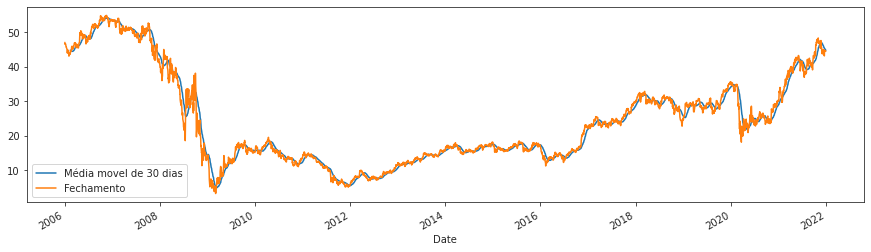

In [115]:
# Trace a média de 30 dias para o preço próximo do Bank Of America para todo o período
plt.figure(figsize=(15,4))

BAC2008 = BAC['Close']
BAC2008_media_movel = BAC2008.rolling(window=30).mean().plot(label = 'Média movel de 30 dias')
BAC2008.plot(label = 'Fechamento')
plt.legend();

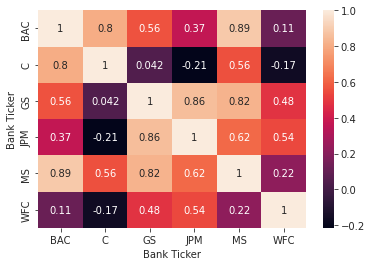

In [119]:
# Crie um mapa de calor da correlação entre os preços de fechamento das ações

corr_matrix = bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).corr()

sns.heatmap(corr_matrix, annot = True);

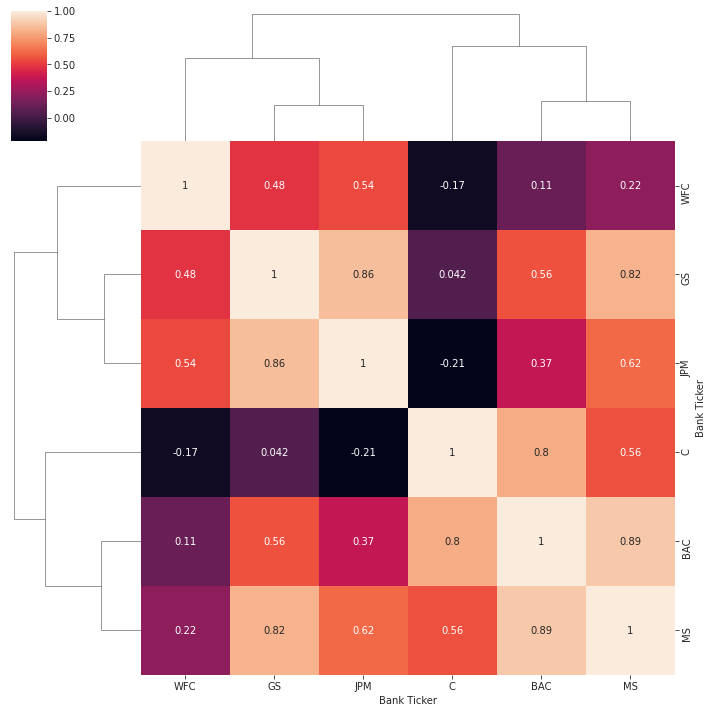

In [121]:
sns.clustermap(corr_matrix, annot = True);